## Lecture Note

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

e:\conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [85]:
df_us = df[df.job_country == "United States"].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
us_pivot = us_pivot.reset_index()
us_pivot['job_posted_month_no'] = pd.to_datetime(us_pivot['job_posted_month'], format='%B').dt.month
us_pivot.sort_values(by='job_posted_month_no')
us_pivot = us_pivot.set_index('job_posted_month')
us_pivot = us_pivot.drop(columns='job_posted_month_no')
top_3 = us_pivot.sum().sort_values(ascending=False).head(3).index.tolist()
top_pivot = us_pivot[top_3]
top_pivot

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
April,6049,4867,2801
August,6634,6318,3269
December,3979,3472,2641
February,6124,4956,3060
January,8494,6915,2655
July,5201,4876,2570
June,5683,4645,2893
March,6218,4779,3183
May,4993,4377,2976


In [63]:
'''
top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3
top_pivot = us_pivot[top_3]
top_pivot.plot(kind='line')
plt.xlabel('2023')
plt.ylabel('Job Counts')
plt.title('Data Jobs Posted in 2023')
plt.xticks(rotation = 45)
plt.legend
plt.show()
'''

"\ntop_3 = df_us['job_title_short'].value_counts().head(3)\ntop_3 = top_3.index.tolist()\ntop_3\ntop_pivot = us_pivot[top_3]\ntop_pivot.plot(kind='line')\nplt.xlabel('2023')\nplt.ylabel('Job Counts')\nplt.title('Data Jobs Posted in 2023')\nplt.xticks(rotation = 45)\nplt.legend\nplt.show()\n"

In [ ]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

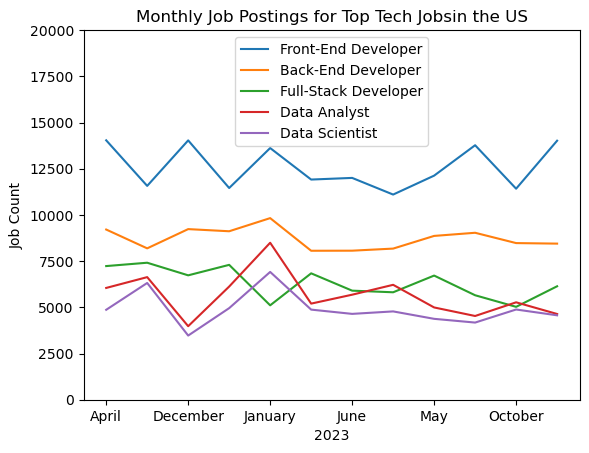

In [88]:
df_us_merged = us_pivot.merge(df_us_software_pivot, on='job_posted_month')
top_5 = (
    df_us_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .tolist()
    )

df_us_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobsin the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()


## Homework

In [126]:
df_us_jobs = df[df['job_country'] == "United States"]
df_us_jobs['job_posted_month'] = df_us_jobs.job_posted_date.dt.strftime('%B')
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='monthly_posting_count')
df_us_jobs = df_us_jobs.merge(df_monthly_postings, on='job_posted_month', how='right')
df_us_jobs.head()


C:\Users\Thomas\AppData\Local\Temp\ipykernel_30348\3922992594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_jobs['job_posted_month'] = df_us_jobs.job_posted_date.dt.strftime('%B')


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,monthly_posting_count
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,17282
1,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,April,17282
2,Senior Data Scientist,"Mission Data Scientist, Senior - Security Clea...","Fayetteville, NC",via My Panhandle Jobs,Full-time,False,Georgia,2023-04-09 14:21:49,False,True,United States,None,NaN,NaN,Booz Allen Hamilton,"['python', 'r', 'postgresql', 'pandas', 'table...","{'analyst_tools': ['tableau', 'splunk'], 'data...",April,17282
3,Data Engineer,Data Engineer,"Las Vegas, NV",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-28 13:09:58,True,False,United States,None,NaN,NaN,Indotronix International Corporation,"['python', 'shell', 'azure', 'databricks', 'ai...","{'cloud': ['azure', 'databricks'], 'libraries'...",April,17282
4,Data Analyst,HR Data Analyst - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-04-24 13:00:47,False,False,United States,None,NaN,NaN,Workoo Technologies,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",April,17282


In [19]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_not_remote_jobs = df[df['job_work_from_home'] == False]
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)
df_merged = df_not_remote_jobs.merge(df_not_remote_salary, on='job_title_short', how='right')
df_merged.head()



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [37]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True]
df_company_remote_count = df_company_remote.groupby('company_name').size().reset_index(name='remote_count')
df_merged = df_company_salary.merge(df_company_remote_count, on='company_name', how='inner')
df_merged.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


要注意 用groupby menthod出来的结果是series，需要用reset_index()去把他变回一个可操作的dataframe，name='XXX'是给算出来的结果column命名，后续才能拿来merge，join，和plot